<a href="https://colab.research.google.com/github/estebanhernandezr/AWEN/blob/master/EstebanAndrey_machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 2: Regresión Lineal

## Introducción

Un modelo de regresión es un modelo que describe la relación entre dos, o más, variables. Específicamente como una(s) de esta(s) variables, denominadas **variables independientes**, influyen en las variaciones de otra variable, denominada **variable dependiente**.

Supongamos queremos encontrar un modelo de regresión que nos permita estimar cual es el precio por metro cuadrado de una vivienda usando como variable observable la edad de esta. Para poder construir este modelo necesitamos de un conjunto de datos históricos que relacionen el precio de la vivienda e indiquen su área. Para este ejemplo utilizaremos la base de datos 
*Residential Building Data Set*, la cual puede ser encontrada en el UCI repository en este [link](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set). Empecemos por cargar y observar los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Cargando el archivo de excel con los datos
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [3]:
# Observando los datos
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


Text(0, 0.5, 'Price [dollars/$m^2$]')

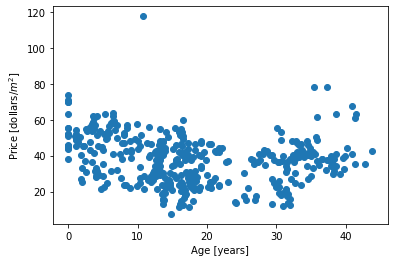

In [4]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')

## Regresión Lineal Simple

vamos a suponer que el modelo que queremos encontrar es un modelo lineal de la forma $ h_\theta(x) = \theta_0+\theta_1x$. Donde $x$ representa la variable independiente, que en este caso sería la antiguedad de la vivienda, y $h_\theta(x)$ es el modelo (o hipotesis) que depende de los parámetros $\theta:\{\theta_0,\theta_1\}$. Este modelo se puede interpretar como una función que mapea los datos de entrada $x$ a valores en $y$. En este caso $y$ es la variable independiente, y representa el precio por $\text{m}^2$ de la vivienda. El problema ahora radica en encontrar los valores  de los parámetros $\theta$ que de acuerdo a una métrica dada son capaces de realizar predicciones acertadas.

Antes de continuar definamos cierta nomenclatura para poder guiarnos a lo largo de la clase:

1. los escalares seran representados por medio de variables tal como $x$ y $y$
2. El número de observaciones que se tienen se denominara $m$
3. $(x^{(i)},y^{(i)})$ representa la $i$-ésima observación.

## Función de Costo

La idea general para solucionar el problema de regresión planteado en la sección anterior, es: encontrar los parámetros $\theta$ tal que $h_\theta(x)$ produce valores cercanos a $y$ para el conjunto de entrenamiento $(x,y)$.

**Pregunta:** Dado un valor de entrada $x$, ¿Cómo puedo medir que tan cercano de $y$ son los valores que obtengo con $h_\theta(x)$?

**Solución:** Existen muchas formas de medir esta distancia, se puede usar la distancia eculidea, u otro tipo de metrica que me permita medir distancias. Sin embargo, una de las más utilziadas es el *error cuadratico medio (Mean Least Squares)*.

### Error Cuadratico Medio

En nuestro problema de regresión el error cuadratio medio se define como:

$$e^{(i)}_{LS}(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)})-y^{(i)}]^2.$$

Una **función de costo** es una función que me indica cual es el costo en el cual incurre el modelo por seleccionar un conjunto de parámetros $\theta$. La función de costo para nuestro problema de regresión será el error cuadrático medio. Tradicionalmente la función de costo se expresa con la letra $J$. De esta forma el problema de regresión se enfoca en encontrar el conjunto de parámetros $\theta$ que minimiza la función de costo, o en otras palabras se debe solucionar:

$$ \min_{\theta_0,\theta_1}J(\theta_0,\theta_1) $$

$$ \begin{equation}
   \begin{split}
      s.t.  & \quad & J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,\\
            & \quad & h_\theta(x) = \theta_0+\theta_1x
   \end{split}
   \end{equation}$$

_Explicación de la intuición alrededor de la función de costo usando un solo parámetro en el modelo_ (Tablero virtual, ejemplo $y = x$)

### ¿Cómo luce la función de costo con múltiple variables?

En este caso nuestra función de costo es convexa, lo cual implica que podemos encontrar un mínimo global, la forma de está función de costo es un paraboloide, como se muestra en la siguiente figura.

![title](img/Cost_Contour.png)

Ahora tratemos de ubicar cual es el valor de la función de costo para diferentes parámetros, así mismo como la salida del modelo.

![title](img/Cost_Contour_Test.png)

**Pregunta:** Suponga que para diferentes combinaciones de parámetros ${\theta_0, \theta_1}$ al ubicar el costo este se encuentran sobre el mismo contorno, ¿Qué podemos conlcuir?

**Solución:** Si esto sucede, esto significa que para todas estas combinaciones de parámetros el error de predicción del modelo es el mismo. Es decir, esas combinaciones de parámetros producen el mismo costo.

## Aprendizaje de los Parámetros

En esta sección estudiaremos dos formas para poder _"aprender"_ cuales son los parámetros óptimos de nuestro modelo de regresión lineal. El pimer método es _algebraico_ y el segundo método es un algoritmo de busqueda utilizando técnicas de optimización.

### Soluciones de Forma Canónica

El probrema de regresión lineal planteado en este ejercicio posee una solución canónica. Esto se debe a la forma de la superficie de error (Función de costo). Antes de continuar, par1 apoder entender la relación entre el problema y el Algebra lineal extendamos un poco la notación que hemos usado hasta el momento:

1. Todos los vectores que trabajaremos son vectores columna y se representaran por letras minuscúlas en negrita.
2. El vector $\mathbf{x}=[x^{(1)},\ldots,x^{(m)}]$ es un vector que contiene todas las $m$ observaciones de la variable independiente. Este vector esta embebido en un espacio $m$-dimensional, es decir $\mathbf{x}\in\mathbb{R}^m$.
2. El vector $\mathbf{y}=[y^{(1)},\ldots,y^{(m)}]$ es un vector que contiene todas las observaciones de la variable dependiente, y $\mathbf{x}\in\mathbb{R}^m$.
3. El vector $\mathbf{1}_m$ es un vector columna con $m$ elementos, y todos sus elementos son unos, y $\mathbf{1}_m\in\mathbb{R}^m$
4. Las matrices se representan por medio de letras mayúsculas en negrita.


Con la notación que hemos definido ahora podemos tratar de convertir todas nuestras ecuaciones en forma matricial.

**Pregunta:** Nuestro modelo esta definido por $h_\theta(x^{(i)}) = x^{(i)}*\theta_1+\theta_0$. este modelo produce por cada valor de $x$ un valor de salida. Utilizando vectores, es posible escribir esta ecuación de tal forma que se pueda encontrar la salida del modelo para varios valores $x$ en una sola operación. Plantee como quedaria este modelo utilizando producto de matrices y vectores.

**Solución:** El modelo en forma matricial queda expresado como $\mathbf{h_\theta}=[\mathbf{x}\:\mathbf{1}]\boldsymbol{\theta}$, donde $\boldsymbol{\theta}=[\theta_1 \quad \theta_0]$, $\theta\in\mathbb{R}^2$. Simplificando un poco más el modelo se puede definir $\mathbf{A} = [\mathbf{x} \: \mathbf{1}]$ como la matrix de regresores, las dimensiones de esta matrix son $m\times2$, es decir $\mathbf{A}\in\mathbb{R}^{m\times2}$. De esta forma el modelo se simplifica a $\mathbf{h_\theta}=\mathbf{A}\boldsymbol{\theta}$.

**Pregunta:** ¿Como se define la función de costo de forma matricial?

**Solución:** antes de definir la funcion de costo, definamos el error de estimación $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$, donde $\mathbf{e}\in\mathbb{R}^m$. De esta forma la función de costo estaría dada por $J(\boldsymbol{\theta}) = \frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, donde $\text{T}$ representa la transpuesta.

#### Entendiendo la función de costo

El objetivo de la función de costo del error cuadratico medio es minimizar la magnitud del error de aproximación. Ese error esta dado por las distancias calculadas entre la predicción del modelo y las observaciones. En la siguiente gráfica se presenta de forma más intuitiva este error.

![title](img/Error_Regresion.png)

Si consideramos que el error esta embebido en un espacio $m$-dimensional, entonces cada uno de los $m$ puntos de la función de error representa el valor que debe tomar en cada una de las coordenadas de ese espacio. Por lo tanto, si quiero calcular la magnitud del error, utilizo el producto punto, ya que $||\mathbf{e}||^2=\mathbf{e}^\text{T}\mathbf{e}$.

Por otro lado, si despejamos la variable independiente de la ecuación del error obtenemos la siguiente expresion $\mathbf{y} = \mathbf{A}\boldsymbol{\theta}+\mathbf{e}$. esta ecuación nos indica que el vector $\mathbf{y}$ se obtiene de la suma de dos vectores, uno que se encuentra embebido en el espacio de columnas de la matrix de regresores y que se calcula como $\mathbf{A}\boldsymbol{\theta}$, y otro que es el vector del error $\mathbf{e}$. Debido a que queremos minimizar el error tenemos que encontrar los parámetros $\theta$ que produzcan el error de menor magnitud posible. El vector del error de magnitud más pequeña que se puede encontrar y que conecte al vector $\mathbf{A}\boldsymbol{\theta}$ con el vector $\mathbf{y}$, es el vector que es perpendicular al espacio de columnas de $\mathbf{A}$. Es decir, al utilizar como función de costo el error cuadratico medio (la magnitud del vector de error) lo que estamos haciendo es encontrar la combinacion de parámetros $\mathbf{\theta}$ que producen la proyección ortogonal de $\mathbf{y}$ sobre el espacio de columnas de $\mathbf{A}$.

![title](img/Proyection.png)

#### Minimizando la función de costo

Ahora procedamos a minimizar la función de costo y encontrar la solución canónica a nuestro problema de regresión.

**Pregunta:** si mi función de costo esta dada por $J(\boldsymbol{\theta})=\frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, con $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$ ¿Cuál es el valor de $\theta$ que minimiza esa función de costo?

**Solución:**La solución debe dar $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{-1}\mathbf{A}\mathbf{y}$. En la práctica, para evitar errores númericos, debido al mal acondicionamiento de matrices (cercanas a matrices singulares) se utiliza la pseudo-inversa, en lugar de la inversa. La pseudo inversa de la amatrix $\mathbf{A}$ se define como $\mathbf{A}^+$. De esa forma la solución esta dada por $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}\mathbf{y}$.

#### Regresión en la práctica

Ahora vamos a aplicar está solución a nuestro ejemplo base.

In [5]:
ones = np.ones((len(data),1))
x = data['X2 house age']
y = data['Y house price of unit area']
A = np.column_stack((x,ones))

theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)),np.transpose(A)),y)
print(theta)

[-0.25148842 42.43469705]


Graficando los resultados del modelo

In [15]:
h = np.matmul(A,theta)
print(h)

[34.38706764 37.53067287 39.08990107 39.08990107 41.17725495 40.64912927
 33.75834659 37.32948214 34.46251416 37.93305434 33.68290006 40.85032001
 39.1653476  37.3043333  39.11504991 33.45656048 42.43469705 37.98335203
 38.18454276 42.05746442 41.30299916 39.79406865 38.73781729 39.89466401
 32.47575565 35.06608637 41.65508295 39.81921749 37.6061194  40.64912927
 35.92114699 34.99063984 32.90328596 38.28513813 38.56177539 38.93900802
 38.73781729 39.41683602 41.65508295 38.36058466 39.01445455 38.20969161
 33.35596512 33.78349543 41.75567831 33.23022091 36.97739835 33.4062628
 36.3486773  35.04093753 36.97739835 34.56310953 34.36191879 39.08990107
 38.3857335  34.46251416 33.98468616 41.55448758 34.81459795 39.08990107
 39.66832444 41.10180843 38.10909624 41.78082716 38.03364971 32.35001144
 42.18320863 40.29704548 34.78944911 39.29109181 40.77487348 33.50685817
 34.26132343 38.96415686 40.7245758  39.34138949 33.4062628  37.27918446
 32.82783944 37.9079055  39.4671337  34.68885374 39.

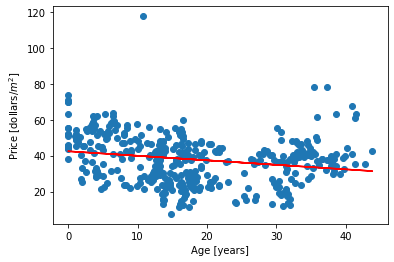

In [7]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.plot(x,h,'r')

FUNCIONA!!!

**Pregunta:** ¿Qué problemas presenta la solución canónica?

**Solución:** Existen dos grandes restricciones:

1. La solución canónica requiere calcular la inversa de una matriz cuadrada de dimensión $n\times n$, con $n$ el número de columnas de la matriz de regresores, lo cual es una operación del orden $\mathcal{O}(n^3)$. Por lo tanto, cuando se tienen muchos regresores, este problema tardaría mucho tiempo en resolverse y requeriría muchos recursos computacionales (memoria). Los sistemas de cómputo actuales pueden resolver inversas de matrices del orden $10.000 \times 10.000$ en un tiempo razonable. Sin embargo si esto aumenta, el problema se vuelve cada vez más difícil de solucionar con los recursos computacionales actuales.

2. Esta solución canónica solamente funciona para encontrar el mínimo de la función de costo de error cuadrático medio y funciones afines. Por lo cual sería interesante encontrar un método que permita encontrar los parámetros de una función de costo, independiente de la forma de esta función.

### Gradiente Descendiente

Debido a las limitaciones que puede tener la solución canónica del problema de regresión lineal, surge la necesidad de crear un algoritmo que se pueda utilizar independientemente si se tienen muchos regresores, o si la superficie de la función de costo no es convexa. El algoritmo mas sencillo y popular que hace esta tarea es gradiente descendiente.

La idea general de los algoritmos de optimización es la siguiente:
1. Inicializar los parámetros $\{\theta_0,\theta_1\}$
2. Continuar cambiando los parámetros para reducir la función de costo $J(\theta_0,\theta_1)$ hasta que converja a un valor mínimo (Se llegue a un valor mínimo o se estabilice la reducción en la función de costo).

**Nota:** Este procedimiento aplica también para funciones de costo que dependan de muchas más variables.

![item](img/Grad_Desc.jpeg)

Es importante observar que dependiendo de la forma de la superficie de la función de costo, es posible que al inicializar el algoritmo para unos paramétros diferentes la unción converja a otro minimo local.

**Pregunta:** ¿En qué dirección debo desplazar los parámetros para lograr que la función de costo disminuya?, en otras palabras ¿Cómo debo cambiar los parámetros para que la función de costo disminuya?

**Solución:** En la dirección contraria al gradiente de la función de costo. 

![item](img/Grad_Desc_LC.png)

Como se puede observar, la idea es actualizar los pesos en dirección contraria al gradiente de la función. Esto se expresa de la siguiente forma:

$$\theta_j := \theta_j-\alpha \frac{\partial}{\partial\theta_j}J(\boldsymbol{\theta}) $$

Donde $\boldsymbol{\theta} = [\theta_0 \: \theta_1]$, $\alpha$ se denomina la taza de aprendizaje (o la constante de aprendizaje) y siempre $\alpha>0$, y el simbolo $:=$ representa una asignación.


Es importante tener en cuenta que al realizar este procedimiento, las asignaciones se hagan todas de una sola vez, o que primero que calculen todos los valores de actualización y después se haga la asignación. Esto sucede porque la función de costo depende de todos los parámetros, y si actualizamos uno de ellos y lo usamos para actualizar el siguiente, entonces nos estamos moviendo en la superficie de la función de costos y ya el valor del gradiente no es el mismo.

#### Intuición alrededor del método de descenso del gradiente

Supongamos que se tiene una función de costo que depende de una sola variable $\theta_1$. Entonces la ecuación de actualización del parámetro está dada por:

$$\theta_1 := \theta_1-\alpha\frac{d}{d\theta_1}J(\theta_1)$$

**Pregunta:** ¿Supongamos que nuestra función de costo es una parábola, ¿Explique cómo funciona  del método de descenso del grandiente si al inicializar $\theta_1$ nos ubicamos a la izquierda o a la derecha del mínimo.

**Solución:** Independientemente de donde este ubicado el parámetro inicial siempre se actualizará en la dirección donde el minimo esta ubicado.

![title](img/GD_izq.png)
![title](img/GD_der.png)

**Preguntas:** ¿Cuál es el efecto de la taza de aprendizaje en el algoritmo?¿Qué sucede si es muy grande o si es muy pequeña?¿Cómo se define muy grande o muy pequeño?

**Solución:** La gráfica de abajo explica la primera y la segunda pregunta. Con respecto a la tercera pregunta, depende de los datos, la varianza de los datos de entrada influencia la derivada y está a su vez afecta el paso de actualización. Note que aunque la taza de aprendizaje se deje fija, si su valor es el adecuado el algoritmo va a converger al mínimo.

![title](img/LearningRateEffect.png)

**Pregunta:**  La siguiente figura muestra la evolución de la función de costo a medida que se actualizan los valores de los parámetros. Explique porque se le relaciona a cada curva la condición determinada de la taza de aprendizaje.

**Nota:** La abscisa de la figura representa las épocas y no el parámetro que cambia, esta es una gráfica de Función de costo _vs_ época. Una época se refiere a una actualización completa de todos los parámetros del modelo.

![item](img/Cost_Ephocs.png)



**Solución:** Revisar lo que sucede en las gráficas de la pregunta anterior.

**Pregunta** ¿ qué pasa si el parámetro se inicializa en un mínimo de la función de costo?

**Solución:** El valor del parámetro no cambia, ya ha llegado al mínimo.

#### Ecuaciones de Gradient Descent para Regresión Lineal

Para calcular las ecuaciones del gradiente descendiente debemos saber cuál es el valor del gradiente de la función de costo. La función de costo está definida por:

$$\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,$$

el número 2 que se inserta ayuda a simplificar una constante que aparece más adelante. Teniendo en cuenta que $h_\theta(x^{(i)}) = \theta_0+\theta_1x^{(i)}$, entonces las respectivas derivadas son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]\\
      \theta_1 &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x^{(i)}
   \end{split}
   \end{equation}$$

De la actualización se puede observar lo siguiente:
1. La actualización para $\theta_0$ trata de hacer que el error tenga media cero, entonces corrige por el offset que ocasiona este parámetro.
2. La actualización para $\theta_1$ trata de corregir la pendiente, de tal forma que el valor medio de corrección por la pendiente sea cero.

**Nota:** Este algoritmo de gradiente descendiente se conoce como **_BATCH_** Gradiente Descent, esto significa que usa todo el conjunto de datos de entrenamiento para realizar la actualización. algunos algoritmos usan solo un subconjunto de los datos de entrenamiento para su actualización, esos son versiones modificadas del gradient descent.

## Regresión Lineal Multivariable

En esta sección trataremos el caso cuando tenemos varios regresores (variables independientes). Para poder continuar adicionaremos algunas definiciones a la nomenclatura:

1. m es el número de observaciones (ejemplos de entrenamiento)
2. n es el número de caracterísicas (regresores)
3. $x_j^{(i)}$ es el valor de la característica (regresor) $j$ en la $i$-ésima observación.
4. $\mathbf{x}^{(i)}$ es el vector de características (regresores) de la $i-$ésima observación, y $\mathbf{x} \in \mathbb{R}^n$.
5. $\boldsymbol{\theta}$ es un vector columna con $n+1$, $\boldsymbol{\theta} \in \mathbb{R}^{n+1}$. (El $+1$ proviene del vector de unos que acompaña a $\theta_0$.

Ahora nuestro modelo contiene $n$ regresores y es de la forma:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n.$$

Lo cual se puede representar de forma vectorial como:

$$\mathbf{h_\theta(x)}= \mathbf{\theta}^{T}\mathbf{x}.$$

### Solución Canónica para Regresión Lineal multivariable

La solución para la regresión lineal múltivariable tiene la misma forma que la solución encontrada anteriormente. La única diferencia es que la matrix de regresores ahora esta formada por $\mathbf{A} = [\mathbf1_m \: \mathbf{X}]$, donde $\mathbf{X} = [\mathbf{x}^{(1)}\: \ldots\: \mathbf{x}^{(m)}]^\text{T}$.

De esta forma la solución sigue estando dada por:
$$\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}\mathbf{y}.$$

Con $\boldsymbol{\hat\theta} \in \mathbb{R}^{n+1}$.

### Gradiente Descendiente para Regresión Lineal multivariable

Siguiendo el mismo análisis anterior, las ecuaciones de actualización par alos parámetros utilizando gradiente descendiente son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_0^{(i)}\\
      \theta_1 &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_1^{(i)}\\
      & & \vdots\\
      \theta_n &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_n^{(i)}\\
   \end{split}
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$.

## TAREA

Para la siguiente clase realiceuna implementación en python del algoritmo de gradiente descendiente. Esta implementación debe solucionar el problema de regresión que se trabajo en clase. Se debe tener en cuenta lo siguiente:

1. Debe realizar la implementación en un notebook de jupyter.
2. La implementación debe ser interactiva. Es decir yo deberia poder modificar la taza de aprendizaje por medio de un elemento de interacción, para esto estudie la libreria _ipywidgets_.
3. Se debe hacer una grafica de la función de costo a medida que se actualixan los parámetros, de tal forma qu ese pueda observar a medida que los parámetros cambia como cambia la función de costo.
4. Realice la implementación para que funcione también para regresión múltiple.

In [13]:
# Observando los datos
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [61]:
x = data['X2 house age']
x = x/x.max()
print(len(x))
print(max(x))
y = data['Y house price of unit area']

414
1.0


In [48]:
def pred(thetas, predictores):
    h = thetas[0]
    for (i, theta) in enumerate(thetas[1:]):
        h += theta*predictores[i]
    return h

def gradient_descent(thetas, tuples, alpha=0.001, iter=10000):
    m = len(tuples)

    errors = []
    for i in range(0, iter):
        grad_thetas = [0 for theta in thetas]

        # GRADIENTES
        for j in range(m):
            y = tuples[j][-1]
            prediction = pred(thetas, tuples[j][:-1])
            
            grad_thetas[0] += (prediction - y)
            for k in range(1, len(grad_thetas)):
                grad_thetas[k] += (prediction-y)*tuples[j][k]

        # ACTUALIZACIÓN DE LOS PARÁMETROS THETA
        for j in range(len(thetas)):
            thetas[j] = thetas[j]-alpha*(grad_thetas[j]/m)      

        error = 0
        for j in range(m):
            y = tuples[j][-1]
            prediction = pred(thetas, tuples[j][:-1])
            error += (y-prediction)**2
        errors.append(error/m)

    return thetas, errors

In [49]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [64]:
def f(alpha, epochs):
    ini_thetas = [0, 0]
    tuples = [(i, j) for (i, j) in zip(x, y)]
    fin_thetas, errores= gradient_descent(ini_thetas, tuples, alpha, epochs)
    
    A = np.column_stack((x,ones))
    h = np.matmul(A,fin_thetas)

    plt.figure(figsize=(5,4), dpi= 80)
    # Graficando Error
    plt.plot([i for i in range(epochs)], errores)
    plt.xlabel('Epocas')
    plt.ylabel('Error cuadratico medio')
    plt.show
    print(fin_thetas, max(errores))

    plt.figure(figsize=(5,4), dpi= 80)
    # Graficando la recta
    plt.scatter(x, y)
    plt.xlabel('Age [years]')
    plt.ylabel('Price [dollars/$m^2$]')
    plt.plot(x,h,'r')
    plt.show


interact(f, alpha=widgets.FloatLogSlider(value=0.5, base=10, min=-10, max=1), epochs=widgets.IntSlider(min=0, max=1000, step=1, value=50));

interactive(children=(FloatLogSlider(value=0.5, description='alpha', max=1.0, min=-10.0), IntSlider(value=50, …